# Raport

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib
import scipy as sp
import pandas as pd
import seaborn as sns
import sklearn.metrics as sm
matplotlib.rc('figure', figsize=(7, 5))

## Opis danych
W raporcie analizowane będą kursy akcji dwóch polskich banków przy zamknięciu Giełdy Papierów Wartościowych na koniec danego dnia - ING Bank Śląski oraz PKO Bank Polski. Analizowany czas to dwa lata - od 17 grudnia 2021 do 17 grudnia 2023. Okres ten daje nam próbę długości 521. Jednak kilka rekordów jest wartościami typu ’NaN’. W kolejnych etapach raportu będziemy je pomijać. Dane pochodzą ze strony https://finance.yahoo.com.

In [28]:
ING = pd.read_csv('ING.WA.csv', na_values='null')
PKO = pd.read_csv('PKO.WA.csv', na_values='null')

## Wykresy cen akcji poszczególnych banków
Poniższe wykresy przedstawiają trajektorie cen 1 akcji dla danego banku w czasie, gdzie dzień 0 odpowiada 17 grudnia 2021. Mimo, że analizowane są dwa lata, to nie zobaczymy tu 730 dni (naturalna kalkulacja 365 · 2) ze względu na dni, w których Giełda Papierów Wartościowych nie funkcjonuje.
Dodatkowo oba wykresy wyglądają do siebie całkiem podobnie. To już może nam sugerować liniowe powiązanie między jednym zbiorem danych, a drugim.

### ING Bank Śląski

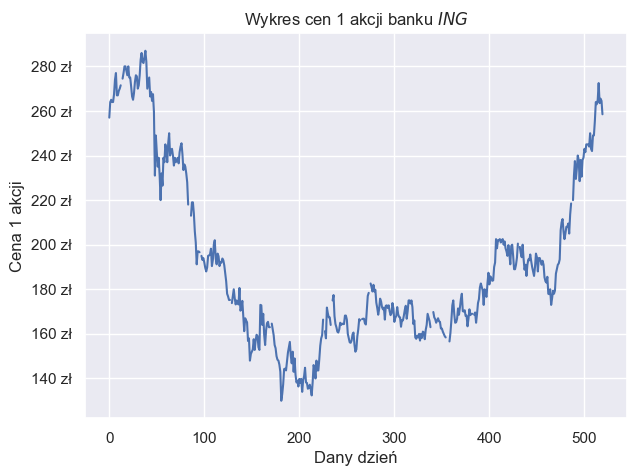

In [29]:
plot = ING['Close'].plot()
plt.title(r'Wykres cen 1 akcji banku $ING$')
plt.xlabel('Dany dzień')
plt.ylabel('Cena 1 akcji')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%u zł'))
plt.show()

### PKO Bank Polski

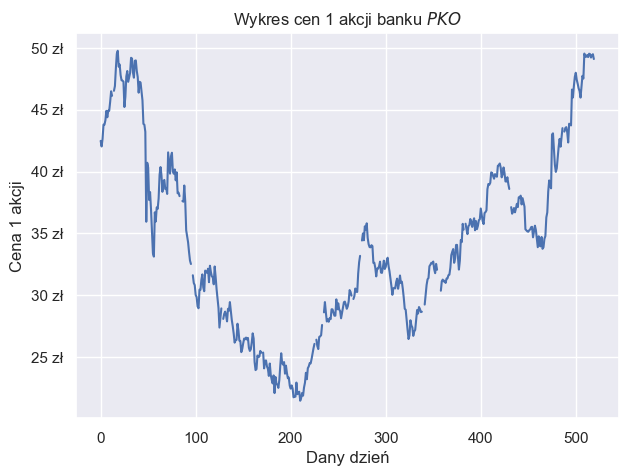

In [30]:
plot = PKO['Close'].plot()
plt.title(r'Wykres cen 1 akcji banku $PKO$')
plt.xlabel('Dany dzień')
plt.ylabel('Cena 1 akcji')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%u zł'))
plt.show()

## Wykresy danych dla poszczególnych banków
### ING Bank Śląski
Wykresy pozwalają nam na dokładniejszą analizę cen 1 akcji na przestrzeni lat. Histogram pokazuje nam jak często bank na koniec dnia miał daną wartość jednej akcji (na szczególną uwagę zasługuje wartość ok. 170zł, która pojawiła się 80 razy). Na wykresie pudełkowym natomiast widzimy, jak wiele wartości odstających znajduje się w tym zbiorze danych. Mogą się one okazać problematyczne w dalszych etapach w kontekście dopasowywania regresji liniowej.

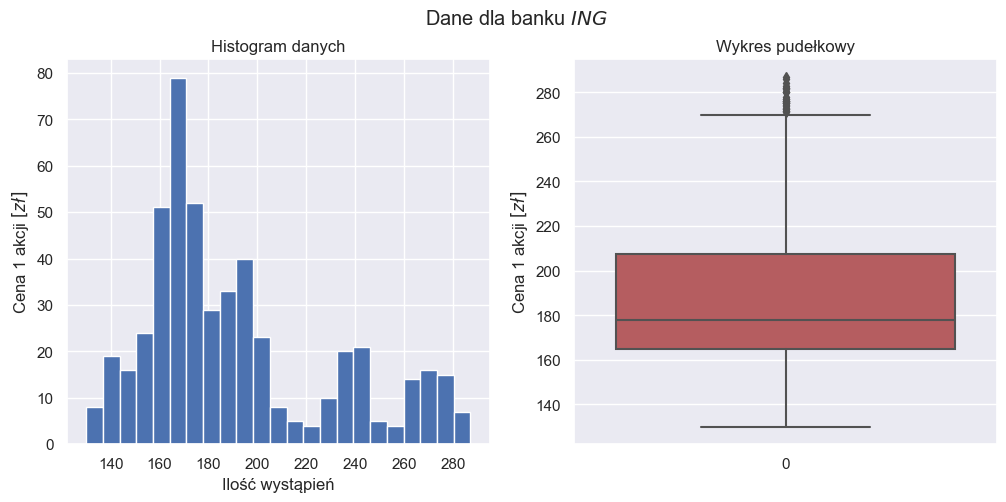

In [31]:
X = np.array(ING['Close'])
X = X[~np.isnan(X)]

n = X.shape[0]

X_mean = np.mean(X)
X_quartiles = np.nanpercentile(X, [25, 50, 75])
X_IQR = X_quartiles[2] - X_quartiles[0]
X_variance = np.sum((X - X_mean)**2)/(n - 2)
X_std = np.sqrt(X_variance)
X_skewness = sp.stats.skew(X, nan_policy='omit')
X_kurtosis = sp.stats.kurtosis(X, nan_policy='omit')

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle(r'Dane dla banku $ING$')

ax[0].hist(X, bins='sqrt')
ax[0].set_title('Histogram danych')
ax[0].set_xlabel('Ilość wystąpień')
ax[0].set_ylabel(r'Cena 1 akcji $[zł]$')

sns.boxplot(data=X, ax=ax[1], color='r').set(ylabel=r'Cena 1 akcji $[zł]$')
ax[1].set_title('Wykres pudełkowy')
plt.show()

### PKO Bank Polski
Histogram wartości dla baknku PKO charakteryzuje się większą równomiernością danych, co potwierdza również wykres pudełkowy, na którym nie pojawiają się wartości odstające.

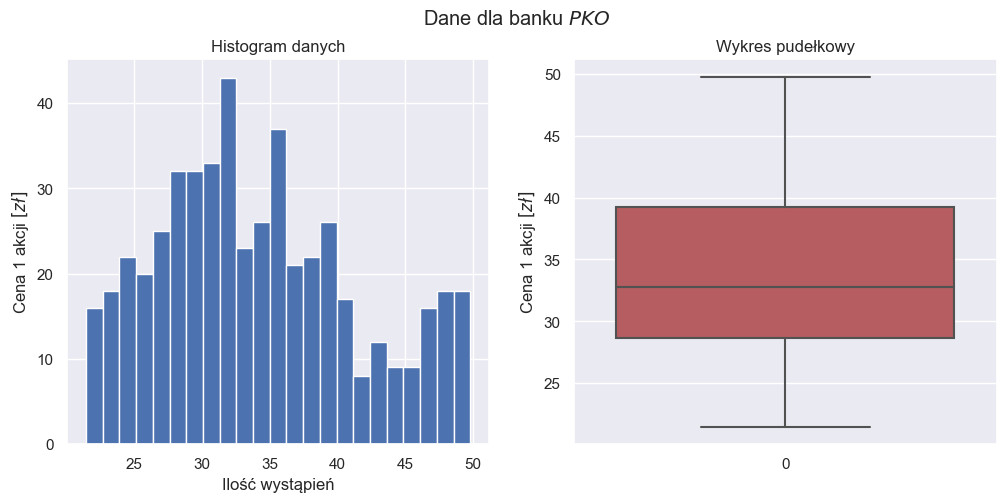

In [32]:
Y = np.array(PKO['Close'])
Y = Y[~np.isnan(Y)]

Y_mean = np.mean(Y)
Y_quartiles = np.nanpercentile(Y, [25, 50, 75])
Y_IQR = Y_quartiles[2] - Y_quartiles[0]
Y_variance = np.sum((Y - Y_mean)**2)/(n - 2)
Y_std = np.sqrt(Y_variance)
Y_skewness = sp.stats.skew(Y, nan_policy='omit')
Y_kurtosis = sp.stats.kurtosis(Y, nan_policy='omit')

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.suptitle(r'Dane dla banku $PKO$')

ax[0].hist(Y, bins='sqrt')
ax[0].set_title('Histogram danych')
ax[0].set_xlabel('Ilość wystąpień')
ax[0].set_ylabel(r'Cena 1 akcji $[zł]$')

sns.boxplot(data=Y, ax=ax[1], color='r').set(ylabel=r'Cena 1 akcji $[zł]$')
ax[1].set_title('Wykres pudełkowy')
plt.show()

## Model regresji liniowej dla zmiennych
Jako zmienną objaśniającą wybieramy ceny kursów banku ING, natomiast za zmienną objaśnianą wybieramy ceny kursów banku PKO. Możemy zaprezentować zależność tych danych na wykresie rozproszenia.

### ING Bank Śląski

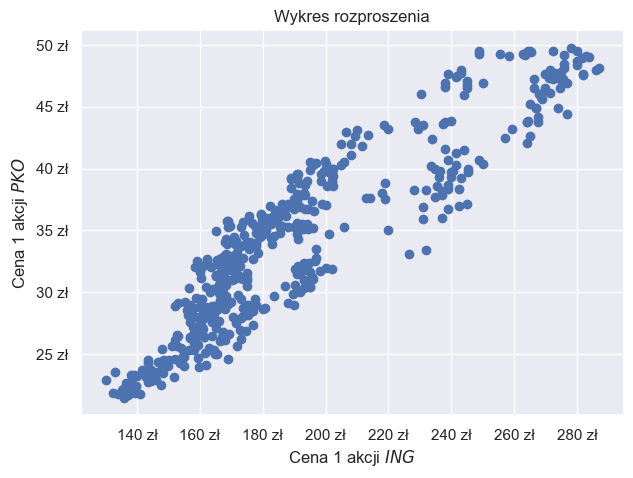

In [33]:
plt.scatter(X, Y)
plt.title('Wykres rozproszenia')
plt.xlabel(r'Cena 1 akcji $ING$')
plt.ylabel(r'Cena 1 akcji $PKO$')
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%u zł'))
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%u zł'))
plt.show()

0.17340219241493493 0.9549493407617291


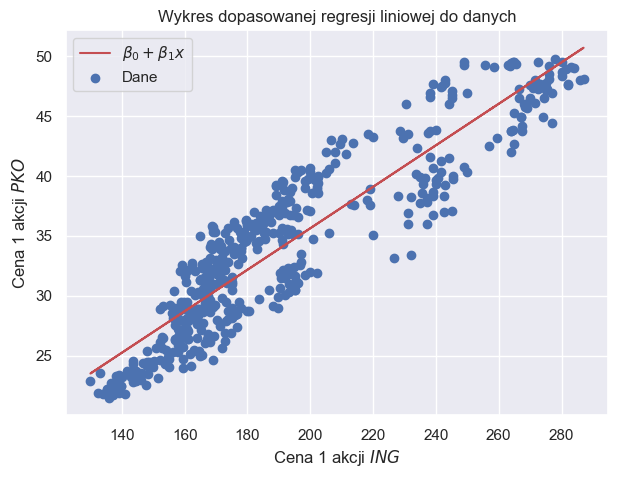

In [34]:
old_b1 = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean)**2)
old_b0 = Y_mean - old_b1 * X_mean
print(old_b1, old_b0)

ypred = old_b0 + old_b1 * X

plt.plot(X, ypred, color='r', label=r'$\beta_0 + \beta_1x$')
plt.scatter(X, Y, label='Dane')
plt.title('Wykres dopasowanej regresji liniowej do danych')
plt.xlabel('Cena 1 akcji $ING$')
plt.ylabel('Cena 1 akcji $PKO$')
plt.legend()
plt.show()

In [35]:
old_SST = np.sum((Y - Y_mean)**2)
old_SSE = np.sum((Y - ypred)**2)
old_SSR = np.sum((ypred - Y_mean)**2)
old_r_2 = old_SSR / old_SST
old_Pearson = np.sum((X - X_mean) * (Y - Y_mean)) / np.sqrt(np.sum((X - X_mean)**2) * np.sum((Y - Y_mean)**2))

residues = Y - ypred
residues_mean = np.mean(residues)

distances = np.argsort(np.abs(residues))
print(distances.shape[0])
X_old = X[distances][450:]
Y_old = Y[distances][450:]
X = X[distances][:450]
Y = Y[distances][:450]

ascending = np.argsort(X)
# print(ascending.shape[0], X.shape[0], Y.shape[0])

Xtrain = X[ascending][:430]
Xtest = X[ascending][430:]
Ytrain = Y[ascending][:430]
Ytest = Y[ascending][430:]
n = Xtrain.shape[0]

# plt.scatter(Xtrain, Ytrain)
# plt.scatter(Xtest, Ytest)
# plt.show()

503


19259.719641792057 2948.9485536864618 16310.771088105595 0.8468851775345951 0.9202636456660642 6.858019892294097


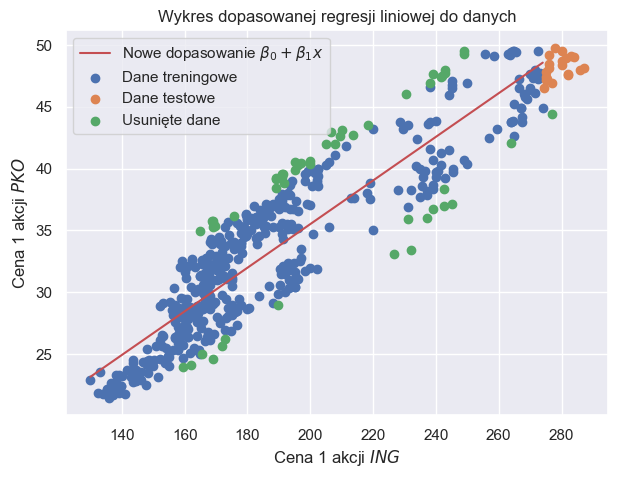

In [36]:
Xtrain_mean = np.mean(Xtrain)
Ytrain_mean = np.mean(Ytrain)
Xtrain_variance = np.sum((Xtrain - Xtrain_mean)**2)/(n - 2)
Ytrain_variance = np.sum((Ytrain - Ytrain_mean)**2)/(n - 2)

b1 = np.sum((Xtrain - Xtrain_mean) * (Ytrain - Ytrain_mean)) / np.sum((Xtrain - Xtrain_mean)**2)
b0 = Ytrain_mean - b1 * Xtrain_mean
ypred = b0 + b1 * Xtrain

SST = np.sum((Ytrain - Ytrain_mean)**2)
SSE = np.sum((Ytrain - ypred)**2)
SSR = np.sum((ypred - Ytrain_mean)**2)
r_2 = SSR / SST
Pearson = np.sum((Xtrain - Xtrain_mean) * (Ytrain - Ytrain_mean)) / np.sqrt(np.sum((Xtrain - Xtrain_mean)**2) * np.sum((Ytrain - Ytrain_mean)**2))
mse = sm.mean_squared_error(Ytrain, ypred)

print(SST, SSE, SSR, r_2, Pearson, mse)

plt.plot(Xtrain, ypred, color='r', label=r'Nowe dopasowanie $\beta_0 + \beta_1x$')
plt.scatter(Xtrain, Ytrain, label='Dane treningowe')
plt.scatter(Xtest, Ytest, label='Dane testowe')
plt.scatter(X_old, Y_old, label='Usunięte dane')
plt.title('Wykres dopasowanej regresji liniowej do danych')
plt.xlabel('Cena 1 akcji $ING$')
plt.ylabel('Cena 1 akcji $PKO$')
plt.legend()
plt.show()

## Predykcja
W tej części zajmiemy się predykcją dla pominiętych wcześniej danych testowych. Przyjmujemy ponownie nieznaną wariancję oraz poziom istotności $\alpha = 0.05$.

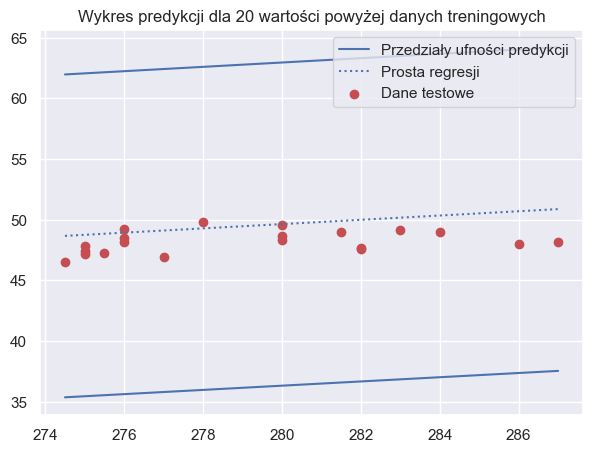

In [47]:
n = Xtrain.shape[0]
alpha = 0.05
t_alpha = sp.stats.t.ppf(1 - alpha/2, df=n-2)
_prognosis = b0 + b1 * Xtest - t_alpha * np.sqrt(Ytrain_variance) * np.sqrt(1 + 1/n + ((Xtest - Xtrain_mean)**2) / np.sum((Xtrain - Xtrain_mean)**2))
prognosis_ = b0 + b1 * Xtest + t_alpha * np.sqrt(Ytrain_variance) * np.sqrt(1 + 1/n + ((Xtest - Xtrain_mean)**2) / np.sum((Xtrain - Xtrain_mean)**2))

plt.plot(Xtest, _prognosis, color='b', label=r'Przedziały ufności predykcji')
plt.plot(Xtest, prognosis_, color='b')
plt.plot(Xtest, b0 + b1 * Xtest, color='b', linestyle='dotted', label=r'Prosta regresji')
plt.scatter(Xtest, Ytest, color='r', label=r'Dane testowe')
plt.title('Wykres predykcji dla 20 wartości powyżej danych treningowych')
plt.legend()
plt.show()

Jak widzimy dane testowe dość dobrze pokrywają się z wyznaczoną wcześniej prostą regresji, jednocześnie wpadając w policzony przedział ufności. Predykcja przyszłych wartości została więc przeprowadzona poprawnie.

## Niezależność residuów

b0 = ((-0.6760900408809598, 1.1170347070932771))
b1 = ((0.15826354909709664, 0.1947035154580453))
residues_sum: 5.400124791776761e-13
residues_mean: 1.255842974831805e-15
residues_var: 6.890066714220706


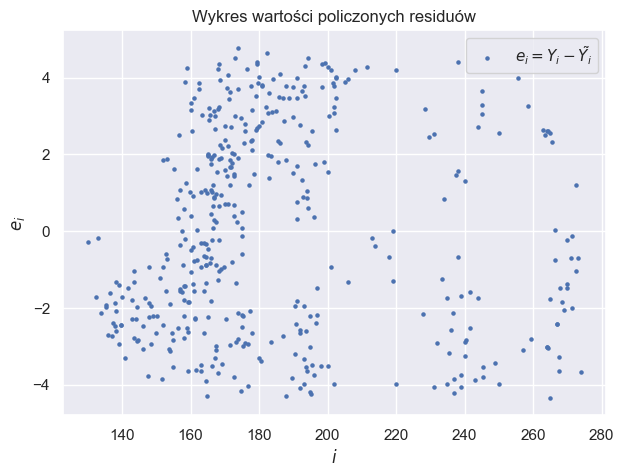

In [39]:
alpha = 0.05
t_alpha = sp.stats.t.ppf(1 - alpha/2, df=n-2)

_b1 = b1 - t_alpha * np.sqrt(Ytrain_variance) / np.sqrt( np.sum((Xtrain - Xtrain_mean)**2) )
b1_ = b1 + t_alpha * np.sqrt(Ytrain_variance) / np.sqrt( np.sum((Xtrain - Xtrain_mean)**2) )
_b0 = b0 - t_alpha * np.sqrt(Ytrain_variance) * ( 1/n + Xtrain_mean**2 / np.sum((Xtrain - Xtrain_mean)**2) )
b0_ = b0 + t_alpha * np.sqrt(Ytrain_variance) * ( 1/n + Xtrain_mean**2 / np.sum((Xtrain - Xtrain_mean)**2) )
print(f'b0 = ({_b0, b0_})')
print(f'b1 = ({_b1, b1_})')

SST = np.sum((Ytrain - Ytrain_mean)**2)
SSE = np.sum((Ytrain - ypred)**2)
SSR = np.sum((ypred - Ytrain_mean)**2)
r_2 = SSR / SST
Pearson = np.sum((Xtrain - Xtrain_mean) * (Ytrain - Ytrain_mean)) / np.sqrt(np.sum((Xtrain - Xtrain_mean)**2) * np.sum((Ytrain - Ytrain_mean)**2))

residues = Ytrain - ypred
residues_sum = np.sum(residues)
residues_mean = np.mean(residues)
residues_var = np.sum((residues - residues_mean)**2)/ (n-2)
print(f'residues_sum: {residues_sum}')
print(f'residues_mean: {residues_mean}')
print(f'residues_var: {residues_var}')

plt.scatter(Xtrain, residues, s=5, label=r'$e_i = Y_i - \tilde{Y_i}$')
plt.title('Wykres wartości policzonych residuów')
plt.xlabel(r'$i$')
plt.ylabel(r'$e_i$')
plt.legend()
plt.show()

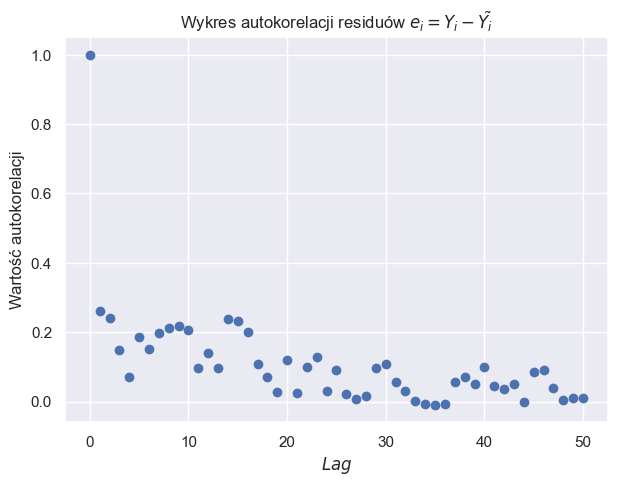

In [44]:
def autocovariance(Xt, max_h):
    n = Xt.shape[0]
    Xmean = np.mean(Xt)

    hs = np.arange(0, max_h + 1, 1)
    emp_gamma = np.empty(shape=(hs.shape[0], 1))

    for index, h in enumerate(hs):
        emp_gamma[index] = np.sum((Xt[:(n-h-1)] - Xmean)*(Xt[h:(n-1)] - Xmean)) / n
    return emp_gamma


autocorr = autocovariance(residues, 0)
autocorrs = autocovariance(residues, 50) / autocorr

plt.scatter(np.arange(0, 51, 1), autocorrs)
plt.title(r'Wykres autokorelacji residuów $e_i = Y_i - \tilde{Y_i}$')
plt.xlabel(r'$Lag$')
plt.ylabel(r'Wartość autokorelacji')
plt.show()

Jak można zauważyć, policzone wartości autokorelacji szybko spadają do 0 i wokół tego 0 pozostają. Może to sugerować niską korelację między danymi oraz niezależność prób od siebie. Oczywiście zerowa autokorelacja nie musi automatycznie oznaczać niezależności danych, jednak taki fakt mocno rzuca sugestię w tę stronę.

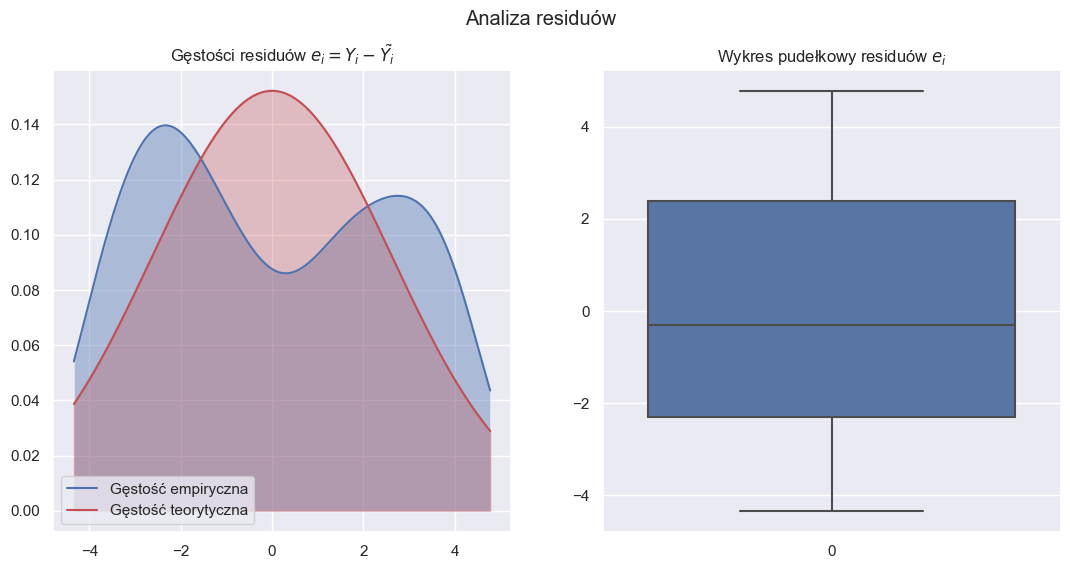

Test Kołogomorowa-Smirnowa: KstestResult(statistic=0.31035138377376364, pvalue=2.7643769908641654e-37, statistic_location=-1.4680599834951806, statistic_sign=1)
Test Jarque-Bera: SignificanceResult(statistic=32.41019583504743, pvalue=9.166750179269217e-08)


In [41]:
x = np.linspace(np.min(residues), np.max(residues), 1000)
kernel = sp.stats.gaussian_kde(residues)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(13, 6)
fig.suptitle('Analiza residuów')

ax[0].plot(x, kernel(x), label='Gęstość empiryczna')
ax[0].plot(x, sp.stats.norm.pdf(x, loc=np.mean(residues), scale = np.sqrt(np.sum((residues - np.mean(residues))**2)/(n-1))), color='r', label='Gęstość teorytyczna')
ax[0].fill_between(x, kernel(x), alpha=0.4)
ax[0].fill_between(x, sp.stats.norm.pdf(x, loc=np.mean(residues), scale = np.sqrt(np.sum((residues - np.mean(residues))**2)/(n-1))), color='r', alpha=0.3)
ax[0].set_title(r'Gęstości residuów $e_i = Y_i - \tilde{Y_i}$')
ax[0].legend()

sns.boxplot(residues, ax=ax[1])
ax[1].set_title(r'Wykres pudełkowy residuów $e_i$')
plt.show()

print(f'Test Kołogomorowa-Smirnowa: {sp.stats.kstest(residues, sp.stats.norm.cdf)}')
print(f'Test Jarque-Bera: {sp.stats.jarque_bera(residues)}')


Z otrzymanych wyników można wywnioskować, że pomimo usunięcia ponad 50 obserwacji odstających od prostej regresji, wciąż istnieją próby zaburzające rozkład residuów. Otrzymane p-wartości dla testów Kołmogorowa-Smirnowa i Jarque-Bera są mniejsze od domyślnego poziomu istotności ($\alpha = 0.05$) funkcji wbudowanych w bibliotece SciPy, co potwierdza odrzucenie hipotezy zerowej przez oba testy. Nie można więc jednoznacznie stwierdzić, że $e_i \sim \mathcal{N}(0, \sigma^2 = 6.89)$.

## Wnioski
Ważnym elementem w dopasowaniu prostej regresji do danych było odrzucenie outliersów. Takie próby mocno zaburzałyby dokładność dopasowania odpowiednich parametrów, do poprawnego opisania i predykcji dalszych danych. Wykazana została zależność między wybranymi przez nas danymi, jednak prosta regresji dopasowana po usunięciu outliersów wciąż nie była wystarczająco dokładna, żeby móc powiedzieć, że pasuje do danych. Analiza residuów ostatecznie wykazała, że nie można powiedzieć, że prosta regresji jest dobrze dopasowana do danych, ponieważ nie spełnia warunku, który zakłada $e_i \sim \mathcal{N}(0, \sigma^2)$.
Oba zestawy danych nie zostały jednak wybrane bez powodu. Istnieje korelacja między ceną akcji obu banków, występujących w tym samym państwie o wspólnej gospodarce i wspólnych regulacjach, stopach inflacji i podobnych klientach.
Biorąc pod uwagę to oraz szereg spełnionych przez dopasowaną prostą założeń daje to nam pewne podstawy do wstępnej predykcji cen akcji jednego banku, w oparciu o predykcję cen akcji drugiego banku.